<a href="https://colab.research.google.com/github/shivamjha-9/titanic-logistic-model/blob/main/Titanic_Survived__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Step 2: Load the dataset
df = pd.read_csv("titanic.csv")

# Step 3: Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Step 4: Handle missing values

# Fill 'Age' and 'Fare' with median
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

# Fill 'Embarked' with mode (safe assignment)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Step 5: Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


# Step 6: Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Step 7: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 10: Predict and Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[50  0]
 [ 0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
# Load the dataset
df = pd.read_csv("titanic.csv")


In [9]:
# Drop irrelevant features
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [10]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [12]:
# Split data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [13]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[50  0]
 [ 0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [17]:
# Cross-validation
scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


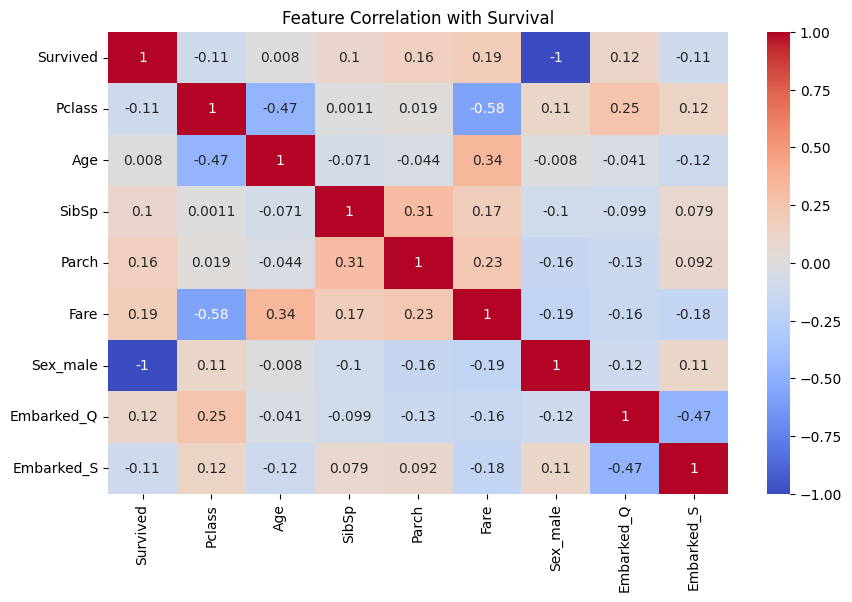

In [18]:
# Add Survived back temporarily for analysis
df['Survived'] = y

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Survival")
plt.show()


In [21]:
# ✅ Predict on new/unseen data (Example)
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    # Create a single-row DataFrame with the same feature structure
    input_df = pd.DataFrame([{
        'Pclass': Pclass,
        'Age': Age,
        'SibSp': SibSp,
        'Parch': Parch,
        'Fare': Fare,
        'Sex_male': 1 if Sex == 'male' else 0,
        'Embarked_Q': 1 if Embarked == 'Q' else 0,
        'Embarked_S': 1 if Embarked == 'S' else 0
    }])

    # ✅ Predict on new/unseen data (Example)
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    # Create a single-row DataFrame with the same feature structure
    input_df = pd.DataFrame([{
        'Pclass': Pclass,
        'Age': Age,
        'SibSp': SibSp,
        'Parch': Parch,
        'Fare': Fare,
        'Sex_male': 1 if Sex == 'male' else 0,
        'Embarked_Q': 1 if Embarked == 'Q' else 0,
        'Embarked_S': 1 if Embarked == 'S' else 0
    }])

    # Scale input
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_scaled)[0]
    return "Survived" if prediction == 1 else "Not Survived"

# 🔍 Example Prediction
print("\nPrediction Example:")
print(predict_survival(Pclass=3, Sex='male', Age=22, SibSp=1, Parch=0, Fare=7.25, Embarked='S'))



Prediction Example:
Not Survived
